# Testing the eRm and RaschPy package using simulations from the RaschPy package

The `RaschPy` package has a built in simulation procedure, that we use to simulate data sets to test the `RaschPy` package in python and the `eRm` package in R. We simulate both dichotomous and polytomous data sets to test the two packages.

In [2]:
# Loading relevant libraries

import pandas as pd             # For data manipulation
import numpy as np              # For numerical operations

import matplotlib.pyplot as plt # For plotting
import seaborn as sns           # For plotting

import sys, os                  # For adding the RaschPy library to the path

import random                   # For generating random numbers


import itertools                # For iterating over lists
import string                   # For string manipulation

import statistics               # For calculating the mean and median
import math                     # For mathematical functions




sys.path.append(os.path.abspath("C:/Users/brf337/Desktop/Rasch package/RaschPy"))
import RaschFunctions as rf # Loading plot functions


sys.path.append(os.path.abspath("C:/Users/brf337/Desktop/Rasch package/RaschPy/RaschPy"))
import __init__ as Rasch # Loading the RaschPy library

# Simulating dichotomous data
We start by simulating dichotomous data using the `RaschPy` package. The package has several built-in simulation functions to simulate both dichotomous data and polytomous data. In the code block below we simulate `n = 1000` individuals and `k = 10` items. Per default `sd=1.5` which is the range standard deviation of each person abilities for randomly generated item difficulties, drawn from a normal distribution (I am unsure what this means, but it is possible to find more information in the RaschPy manual). We specify the item difficulties with the argument `manual_diffs`.

In [35]:
k = 10
n = 1000


# Also set the person ability. Simulate 1000 times and check bias, variance and coverage of the estimates


random.seed(80120205)
SML_Sims = Rasch.SLM_Sim(no_of_items = k, 
                         no_of_persons = n,
                         manual_diffs = [-1, 1, -0.5, 0.5, 0.1, -0.1, -2, 2, 2.5, -2.5]) # Must sum to 0


# Save the simulated data to a csv file for use in R
#SML_Sims.scores.to_csv("C:/Users/brf337/Desktop/Rasch package/BinarySimDataFrame.csv", sep=',')

We run a few checks of the simulation to check, that the simulated data have the desired properties.

In [38]:
# Head of the simulated data
SML_Sims.scores.head()

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
Person_1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
Person_2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
Person_3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
Person_4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
Person_5,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0


In [39]:
# The specified difficulties
SML_Sims.diffs

Item_1    -1.0
Item_2     1.0
Item_3    -0.5
Item_4     0.5
Item_5     0.1
Item_6    -0.1
Item_7    -2.0
Item_8     2.0
Item_9     2.5
Item_10   -2.5
dtype: float64

In [40]:
# Group by SumScores and average the abilities
SumScores = pd.DataFrame(SML_Sims.scores.sum(axis=1), columns = ['SumScores'])
SumScores['Abilities'] = SML_Sims.abilities
AvgAbilities = SumScores.groupby('SumScores').mean('Abilities')
AvgAbilities

,Abilities
SumScores,
0.0,-2.791891
1.0,-2.139863
2.0,-1.542493
3.0,-0.993734
4.0,-0.466171
5.0,-0.015311
6.0,0.479195
7.0,0.956887
8.0,1.497624


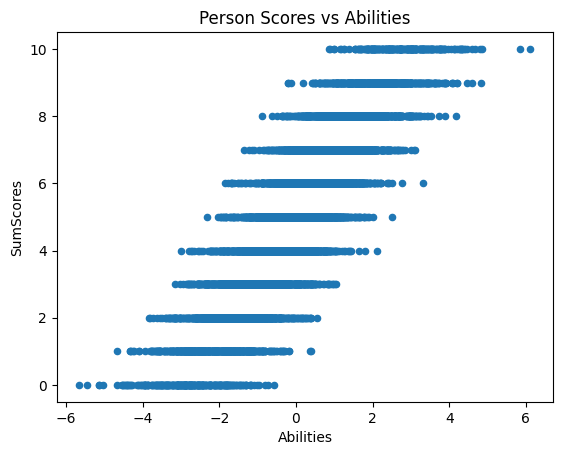

In [41]:
rf.plot_person_score_data(SumScores)

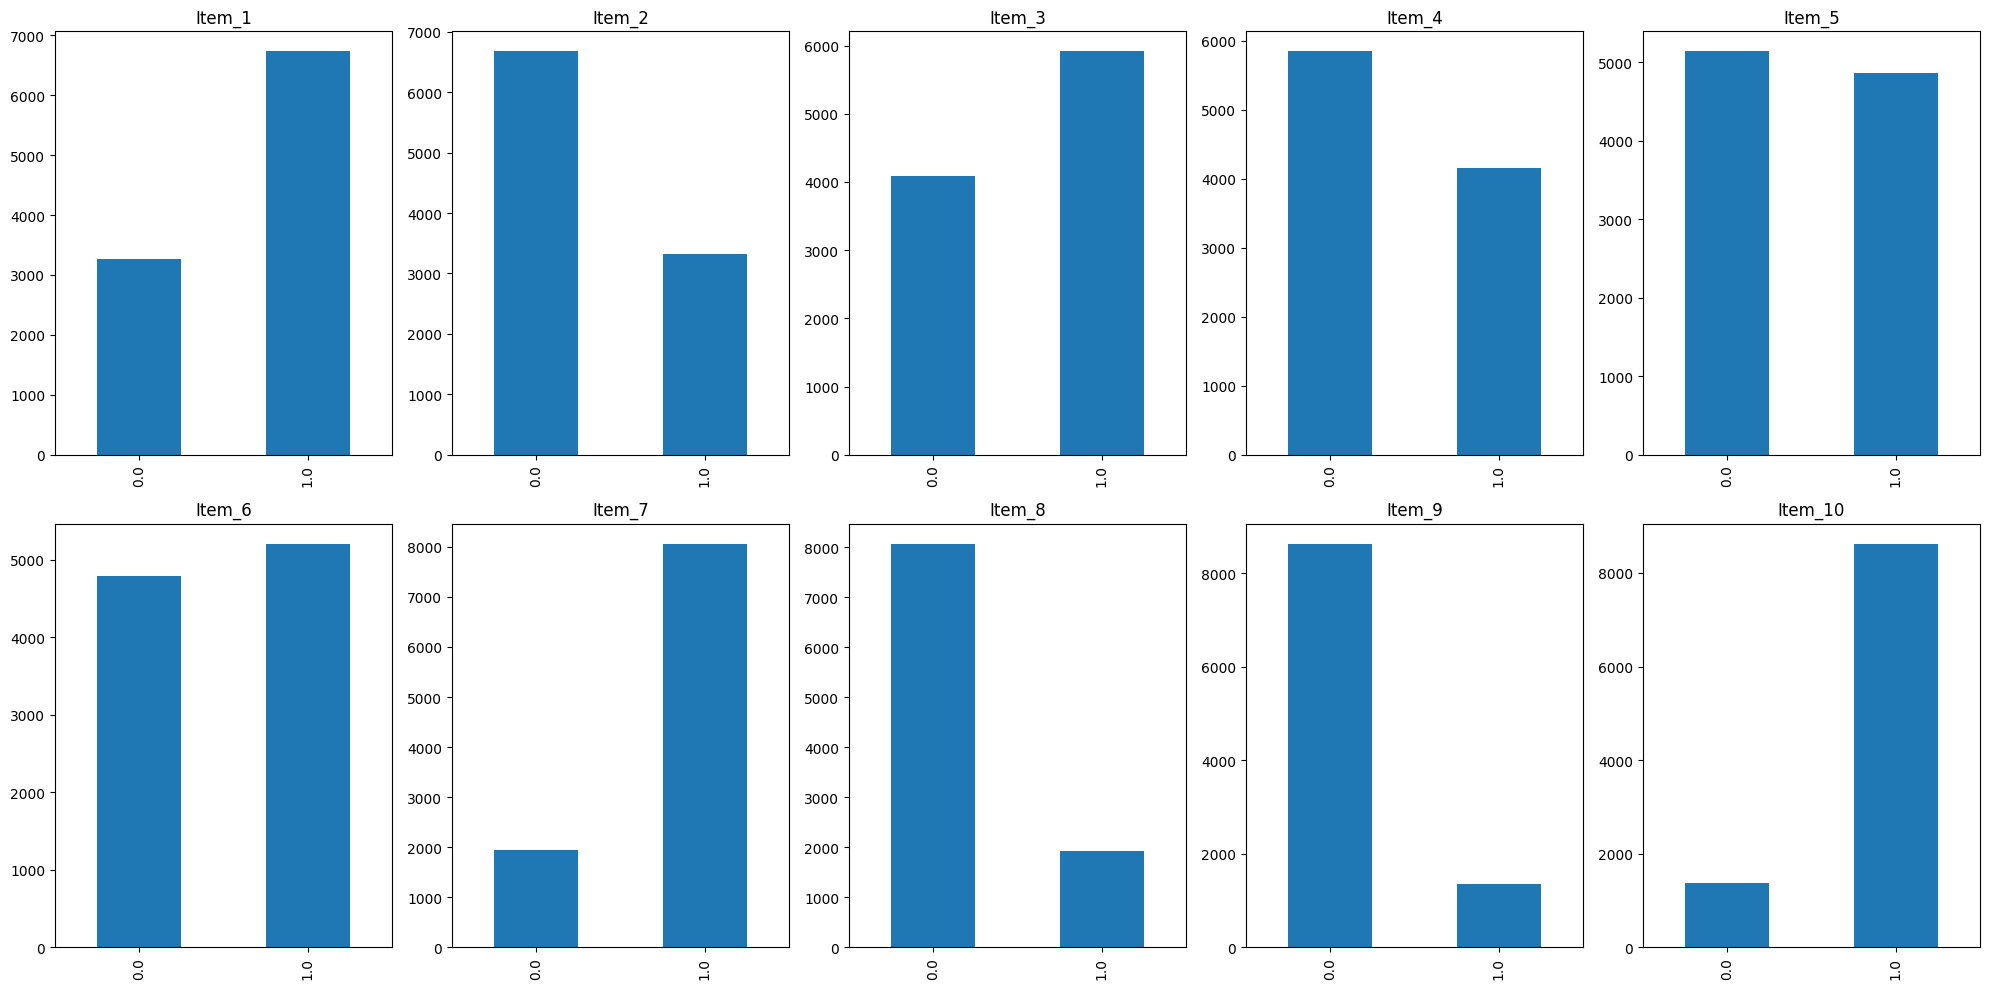

In [42]:
rf.plot_item_data(SML_Sims.scores)

## Running model
With the simulated data and above checks in place, we can fit models to the data. We use the `Rasch.SLM()` function to create an object of class `SLM` which will be used for the python analysis. 

In [43]:
RaschBinaryTestSim = Rasch.SLM(SML_Sims.scores)

We can now use the methods implemented for the `SLM` class to run the analysis. We start by calling the `item_stats_df()` method on the object with most of the standard arguments:

`self.item_stats_df(full=False, zstd=False, disc=Flase, point_measure_corr=False, dp=3, warm_corr=True, tolerance=1e-07, max_iters=100, ext_score_adjustment=0.5, method='cos', constant=0.1, no_of_samples=100, interval=None)`

We set `full = True` to get a table with all available statistics. The `item_stats_df()` method estimates item difficulties using the specified `method`. Later we try another `method` argument than `"cos"` to see how this changes the estimates, but we refrain from changing any other parameters so far.

In [44]:
RaschBinaryTestSim.item_stats_df(full=True)
RaschBinarySummaryDataFrame = RaschBinaryTestSim.item_stats.loc[:, ['Estimate', 'SE', '2.5%', '97.5%']]
RaschBinarySummaryDataFrame["True Difficulty"] = SML_Sims.diffs
RaschBinarySummaryDataFrame["ConfInt contains True Difficulty"] = RaschBinarySummaryDataFrame.apply(lambda x: x['2.5%'] <= x['True Difficulty'] <= x['97.5%'], axis=1)
RaschBinarySummaryDataFrame

,Estimate,SE,2.5%,97.5%,True Difficulty,ConfInt contains True Difficulty
Item_1,-1.008,0.026,-1.050,-0.945,-1.0,True
Item_2,0.998,0.025,0.951,1.038,1.0,True
Item_3,-0.502,0.028,-0.558,-0.453,-0.5,True
Item_4,0.503,0.024,0.459,0.549,0.5,True
Item_5,0.091,0.026,0.041,0.137,0.1,True
Item_6,-0.100,0.022,-0.136,-0.057,-0.1,True
Item_7,-1.972,0.034,-2.026,-1.902,-2.0,True
Item_8,1.970,0.029,1.917,2.034,2.0,True
Item_9,2.526,0.035,2.466,2.601,2.5,True
Item_10,-2.508,0.036,-2.583,-2.443,-2.5,True


We note that the model succesfully manages to estimate most parameters well and the true parameter is mostly contained in the the confidence intervals (I have not calculated coverage but I have run a few simulations and the confidence intervals mostly contain the true parameter).

We can likewise use the method `person_stats_df()` method on the object to estimate person parameters. Again we use most of the standard arguments:

`self.person_stats_df(full=False, zstd=False, disc=Flase, point_measure_corr=False, dp=3, warm_corr=True, tolerance=1e-07, max_iters=100, ext_score_adjustment=0.5, method='cos', constant=0.1, no_of_samples=100, interval=None)`

We set `full = True` again to get a table with all available statistics. The `person_stats_df()` method estimates item difficulties using the specified `method`. Later we try another `method` argument than `cos` to see how this changes the estimates, but we refrain from changing any other parameters.

In [45]:
RaschBinaryTestSim.person_stats_df(full=True)
RaschBinaryTestSim.person_stats

,Estimate,CSEM,RSEM,Score,Max score,p,Infit MS,Infit Z,Outfit MS,Outfit Z
Person_1,-0.556,0.776,0.552,4,10,0.4,0.506,-1.577,0.392,-1.008
Person_2,2.623,1.045,0.920,9,10,0.9,0.775,-0.199,0.338,0.144
Person_3,-0.002,0.764,0.809,5,10,0.5,1.122,0.460,1.229,0.559
Person_4,-0.556,0.776,0.979,4,10,0.4,1.593,1.523,3.084,2.303
Person_5,1.147,0.815,0.757,7,10,0.7,0.863,-0.209,0.810,0.050
...,...,...,...,...,...,...,...,...,...,...
Person_9996,0.553,0.776,0.552,6,10,0.6,0.505,-1.578,0.391,-1.016
Person_9997,-0.002,0.764,0.694,5,10,0.5,0.825,-0.436,0.630,-0.536
Person_9998,1.147,0.815,0.832,7,10,0.7,1.043,0.240,0.775,0.003
Person_9999,-1.149,0.814,0.698,3,10,0.3,0.734,-0.576,0.561,-0.321


The method returns an estimate for each individual, but we can retrieve an estimate for each score in the following dataframe.

In [71]:
# Then drop rownames and sort in ascending order of scores
RaschBinaryPersonSummaryDataFrame = RaschBinaryTestSim.person_stats[['Estimate', 'Score', 'CSEM']].drop_duplicates().sort_values(by='Score').reset_index(drop=True)
RaschBinaryPersonSummaryDataFrame

,Estimate,Score,CSEM
0,-2.961,0,NaN
1,-2.596,1,1.044
2,-1.799,2,0.890
3,-1.127,3,0.812
4,-0.538,4,0.773
5,0.012,5,0.760
6,0.561,6,0.771
7,1.145,7,0.808
8,1.803,8,0.881
9,2.570,9,1.029


We can finally plot how the estimated person parameters match the simulated data:

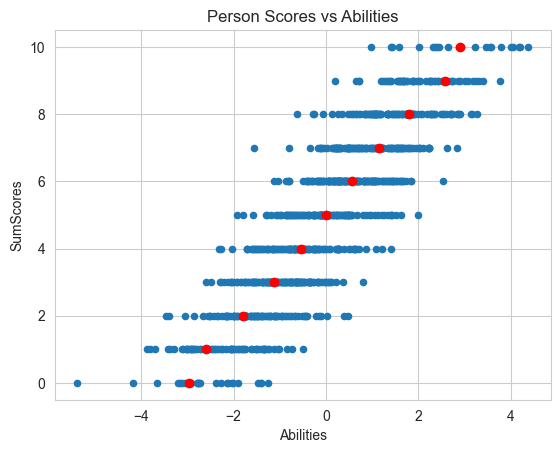

In [72]:
rf.plot_person_score_data_score_est(SumScores, RaschBinaryPersonSummaryDataFrame.loc[:,['Estimate', 'Score']])

It is also possible to plot `icc` curves for each item among other plots (for instance category response curves, information curve, test characteristic curve and so on):

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.


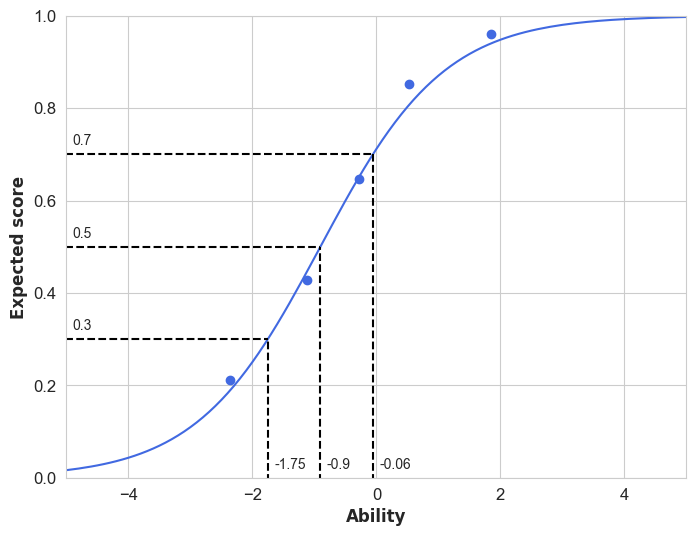

In [110]:
RaschBinaryTestSim.icc("Item_1", obs = True, score_labels= True, score_lines = [0.3, 0.5, 0.7], no_of_classes=5)

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.


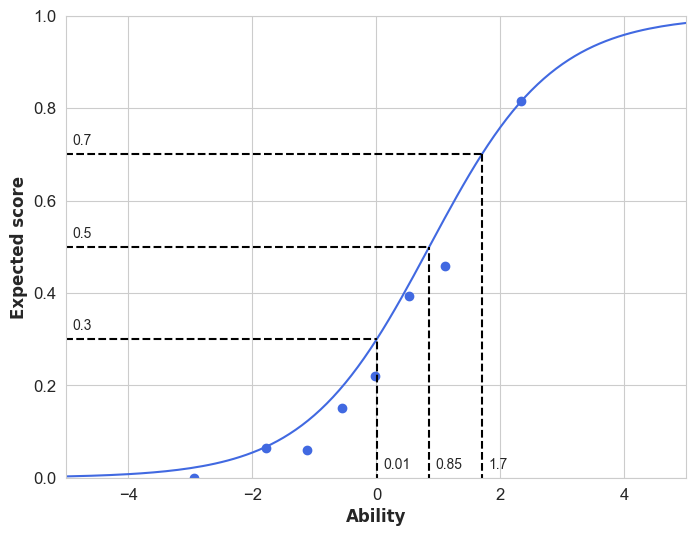

In [105]:
RaschBinaryTestSim.icc("Item_2", obs = True, score_labels= True, score_lines = [0.3, 0.5, 0.7], no_of_classes=8)

I have not found plotting method for person-item maps or CICC plots, so this is a feature in R that is not present in Python (to my knowledge at least).

## Dichotomous data with new estimation method
We redo the exact procedure as above except this time we try to use the `"log-lik"` estimation method instead of the `"cos"` estimation method.

In [75]:
RaschBinaryTestSim = Rasch.SLM(SML_Sims.scores)
RaschBinaryTestSim.item_stats_df(full=True, method = "log-lik")
RaschBinarySummaryDataFrame = RaschBinaryTestSim.item_stats.loc[:, ['Estimate', 'SE', '2.5%', '97.5%']]
RaschBinarySummaryDataFrame["True Difficulty"] = SML_Sims.diffs
RaschBinarySummaryDataFrame["ConfInt contains True Difficulty"] = RaschBinarySummaryDataFrame.apply(lambda x: x['2.5%'] <= x['True Difficulty'] <= x['97.5%'], axis=1)
RaschBinarySummaryDataFrame

,Estimate,SE,2.5%,97.5%,True Difficulty,ConfInt contains True Difficulty
Item_1,-0.904,0.068,-1.060,-0.786,-1.0,True
Item_2,0.854,0.063,0.750,0.985,1.0,False
Item_3,-0.437,0.062,-0.563,-0.330,-0.5,True
Item_4,0.370,0.057,0.253,0.484,0.5,False
Item_5,-0.064,0.066,-0.171,0.081,0.1,False
Item_6,-0.173,0.059,-0.275,-0.054,-0.1,True
Item_7,-1.554,0.065,-1.674,-1.452,-2.0,False
Item_8,1.744,0.090,1.586,1.970,2.0,False
Item_9,2.030,0.113,1.844,2.287,2.5,False
Item_10,-1.866,0.050,-1.981,-1.784,-2.5,False


This time the model rarely manages to estimate the true parameters so it appears to be quite important what method is used for estimation. I have not looked into how each estimation method works but this could perhaps be of interest to uncover, why one method works better than the other on this simulated data.

In [76]:
RaschBinaryTestSim.person_stats_df(full=True, method = "log-lik")
RaschBinaryTestSim.person_stats

,Estimate,CSEM,RSEM,Score,Max score,p,Infit MS,Infit Z,Outfit MS,Outfit Z
Person_1,0.479,0.743,0.848,6,10,0.6,1.301,0.929,1.154,0.466
Person_2,-1.630,0.838,0.800,2,10,0.2,0.911,-0.076,0.729,-0.010
Person_3,-1.630,0.838,0.762,2,10,0.2,0.827,-0.292,0.544,-0.278
Person_4,-0.527,0.736,0.578,4,10,0.4,0.617,-1.338,0.511,-1.019
Person_5,1.023,0.782,0.535,7,10,0.7,0.469,-1.604,0.371,-1.129
...,...,...,...,...,...,...,...,...,...,...
Person_996,1.023,0.782,0.535,7,10,0.7,0.469,-1.604,0.371,-1.129
Person_997,1.023,0.782,0.775,7,10,0.7,0.983,0.084,0.790,-0.148
Person_998,-2.318,0.983,0.721,1,10,0.1,0.538,-0.739,0.279,-0.300
Person_999,0.479,0.743,0.705,6,10,0.6,0.899,-0.197,0.736,-0.446


In [77]:
# Then drop rownames and sort in ascending order of scores
RaschBinaryPersonSummaryDataFrame = RaschBinaryTestSim.person_stats[['Estimate', 'Score', 'CSEM']].drop_duplicates().sort_values(by='Score').reset_index(drop=True)
RaschBinaryPersonSummaryDataFrame

,Estimate,Score,CSEM
0,-2.627,0,NaN
1,-2.318,1,0.983
2,-1.630,2,0.838
3,-1.049,3,0.768
4,-0.527,4,0.736
5,-0.028,5,0.729
6,0.479,6,0.743
7,1.023,7,0.782
8,1.640,8,0.858
9,2.369,9,1.007


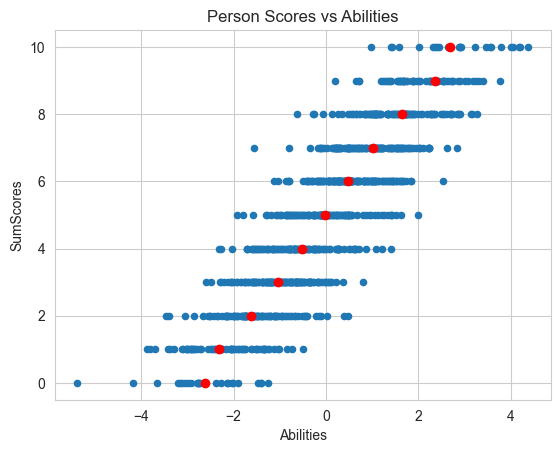

In [78]:
rf.plot_person_score_data_score_est(SumScores, RaschBinaryPersonSummaryDataFrame.loc[:,['Estimate', 'Score']])

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.


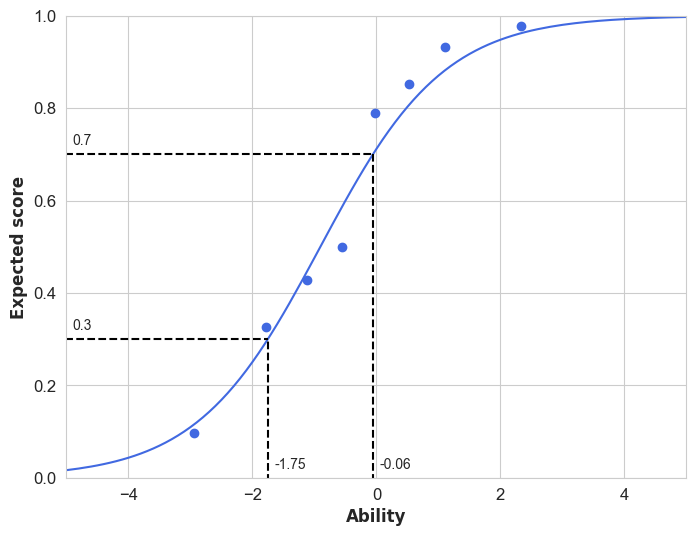

In [79]:
RaschBinaryTestSim.icc("Item_1", obs = True, score_labels= True, score_lines = [0.3,0.7], no_of_classes=8)

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.


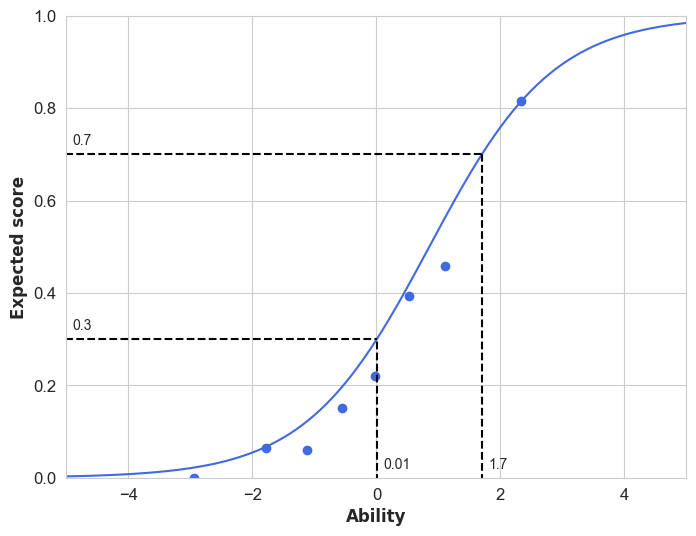

In [80]:
RaschBinaryTestSim.icc("Item_2", obs = True, score_labels= True, score_lines = [0.3,0.7], no_of_classes=8)

# Simulating polytomous data
We then simulate polytomous data using the `RaschPy` package. In the code block below we simulate `n = 1000` individuals and `k = 10` items. Per default `sd=1.5` which is the range standard deviation of each person abilities for randomly generated item difficulties, drawn from a normal distribution (I am unsure what this means, but it is possible to find more information in the RaschPy manual). We specify the item difficulties with the argument `manual_diffs`.

In [115]:
k = 10
n = 1000

random.seed(80120205)
PCM_Sims = Rasch.PCM_Sim(no_of_items = k, max_score_vector=[5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
                         no_of_persons = n,
                         manual_diffs = [-1, 1, -0.5, 0.5, 0.1, -0.1, -2, 2, 2.5, -2.5]) # Must sum to 0


# Save the simulated data to a csv file for use in R
PCM_Sims.scores.to_csv("C:/Users/brf337/Desktop/Rasch package/PolytomousSimDataFrame.csv", sep=',')

C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:21281: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.diffs[item]
C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:21288: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.diffs[item] -= threshold_mean
C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:21288: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self.diffs[item] -= th

We run a few checks of the simulation to check, that the simulated data have the desired properties.

In [82]:
# Head of the simulated data
PCM_Sims.scores.head()

,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10
Person_1,5.0,2.0,2.0,3.0,4.0,5.0,5.0,2.0,3.0,4.0
Person_2,2.0,0.0,2.0,0.0,2.0,1.0,3.0,0.0,0.0,4.0
Person_3,4.0,2.0,3.0,4.0,3.0,5.0,5.0,1.0,2.0,4.0
Person_4,4.0,0.0,4.0,2.0,3.0,4.0,5.0,0.0,0.0,5.0
Person_5,5.0,1.0,4.0,1.0,2.0,1.0,5.0,0.0,0.0,4.0


In [83]:
# The specified difficulties
PCM_Sims.diffs

Item_1    -1.0
Item_2     1.0
Item_3    -0.5
Item_4     0.5
Item_5     0.1
Item_6    -0.1
Item_7    -2.0
Item_8     2.0
Item_9     2.5
Item_10   -2.5
dtype: float64

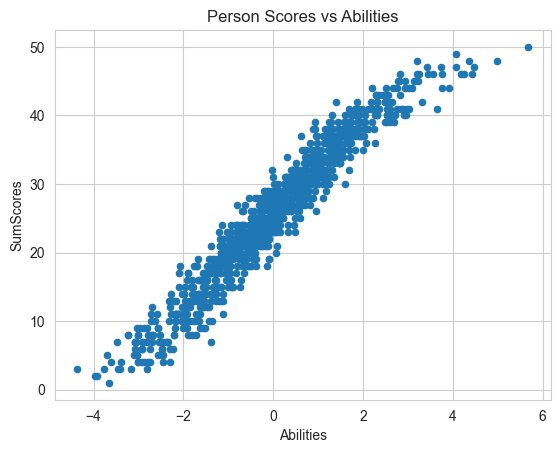

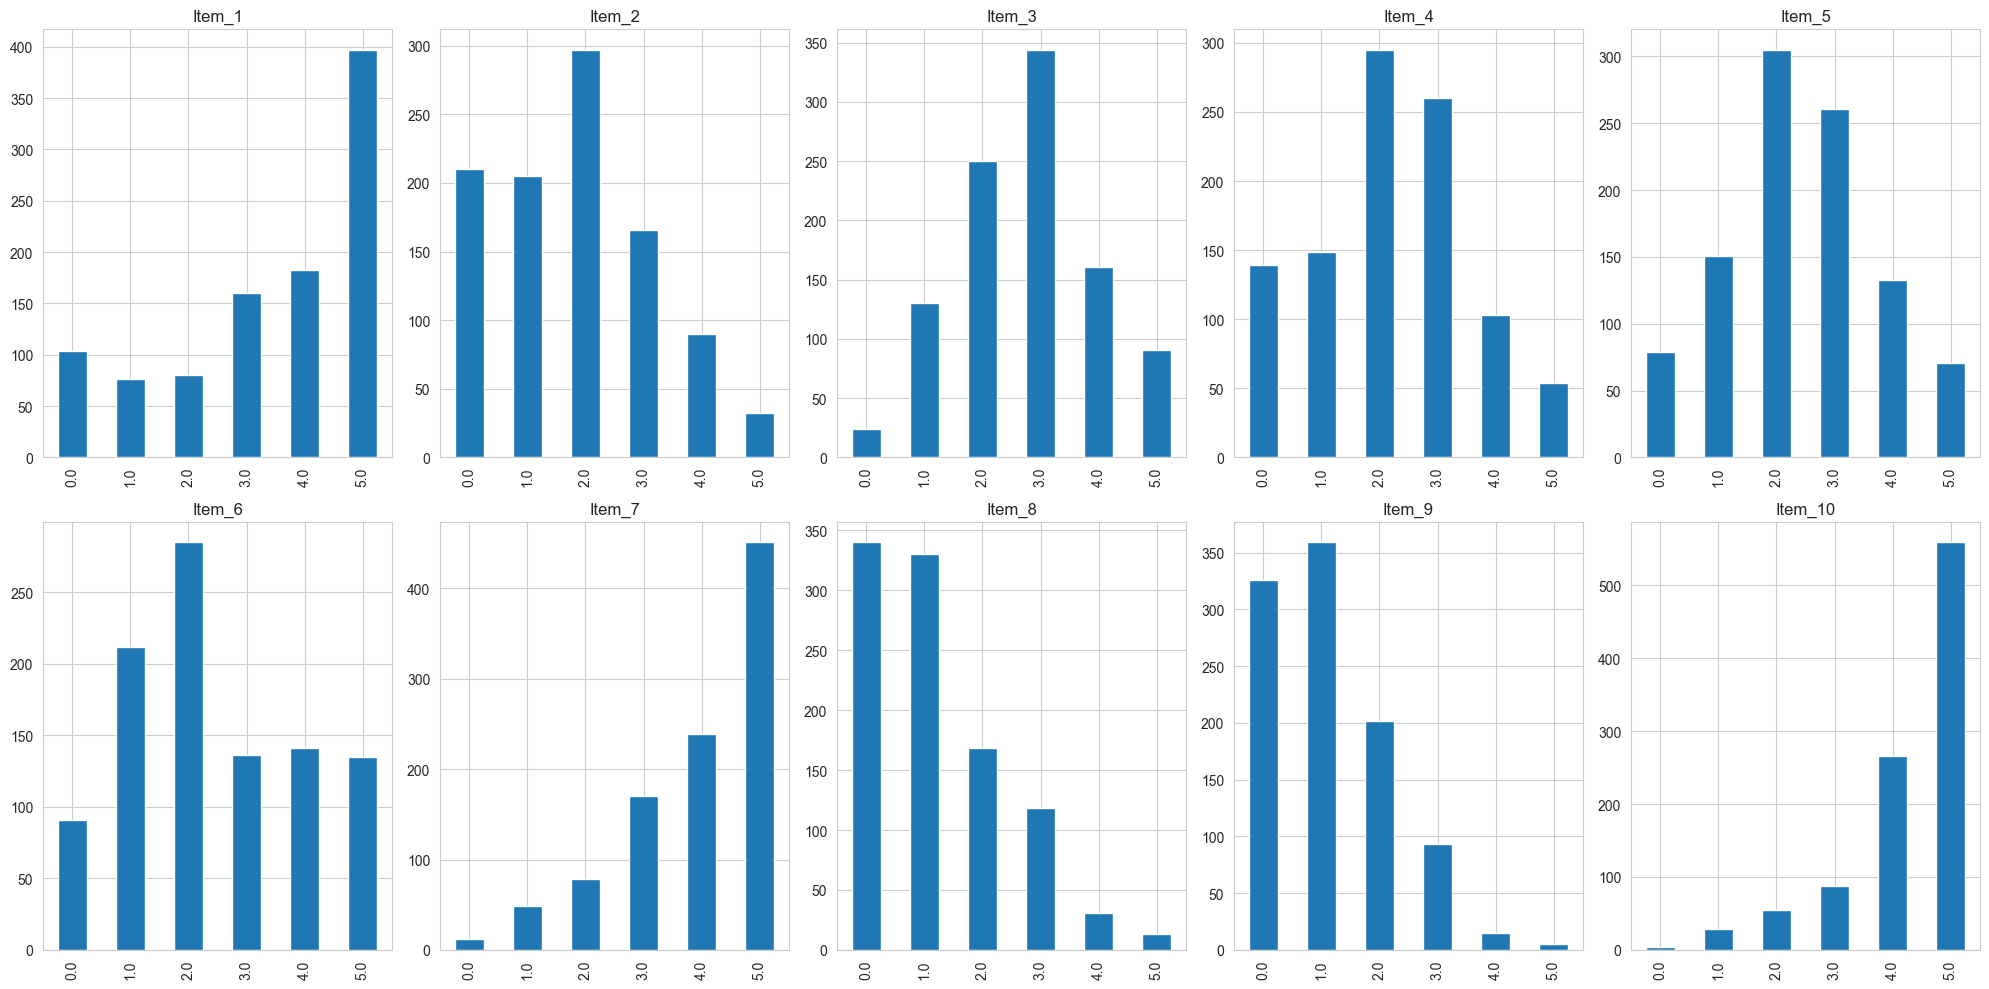

In [84]:
# Group by SumScores and average the abilities
SumScores = pd.DataFrame(PCM_Sims.scores.sum(axis=1), columns = ['SumScores'])
SumScores['Abilities'] = PCM_Sims.abilities
AvgAbilities = SumScores.groupby('SumScores').mean('Abilities')
AvgAbilities
rf.plot_person_score_data(SumScores)
rf.plot_item_data(PCM_Sims.scores)

## Running model
With the simulated data and above checks in place, we can fit models to the data. We use the `Rasch.PCM()` function to create an object of class `PCM` which will be used for the python analysis. 

In [116]:
RaschPolyTestSim = Rasch.PCM(PCM_Sims.scores)

We can now use the methods implemented for the `PCM` class to run the analysis. We start by calling the `item_stats_df()` method on the object with most of the standard arguments:

`self.item_stats_df(full=False, zstd=False, disc=Flase, point_measure_corr=False, dp=3, warm_corr=True, tolerance=1e-07, max_iters=100, ext_score_adjustment=0.5, method='cos', constant=0.1, no_of_samples=100, interval=None)`

We set `full = True` to get a table with all available statistics. The `item_stats_df()` method estimates item difficulties using the specified `method`. Later we try another `method` argument than `"cos"` to see how this changes the estimates, but we refrain from changing any other parameters so far.

In [117]:
RaschPolyTestSim.item_stats_df(full=True)

C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:2577: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i in range(self.max_score_vector[item_1])]
C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:2576: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for j in range(self.max_score_vector[item_2])]
C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:549: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.il

In [118]:
RaschPolySummaryDataFrame = RaschPolyTestSim.item_stats.loc[:, ['Estimate', 'SE', '2.5%', '97.5%']]
RaschPolySummaryDataFrame["True Difficulty"] = PCM_Sims.diffs
RaschPolySummaryDataFrame["ConfInt contains True Difficulty"] = RaschPolySummaryDataFrame.apply(lambda x: x['2.5%'] <= x['True Difficulty'] <= x['97.5%'], axis=1)
RaschPolySummaryDataFrame

,Estimate,SE,2.5%,97.5%,True Difficulty,ConfInt contains True Difficulty
Item_1,-1.078,0.053,-1.189,-1.000,-1.0,True
Item_2,1.021,0.044,0.958,1.113,1.0,True
Item_3,-0.517,0.045,-0.604,-0.441,-0.5,True
Item_4,0.548,0.064,0.437,0.678,0.5,True
Item_5,0.196,0.040,0.119,0.274,0.1,False
Item_6,-0.168,0.048,-0.282,-0.087,-0.1,True
Item_7,-2.196,0.074,-2.351,-2.088,-2.0,False
Item_8,2.137,0.065,2.063,2.305,2.0,False
Item_9,2.455,0.091,2.309,2.666,2.5,True
Item_10,-2.398,0.093,-2.618,-2.256,-2.5,True


We note that the model succesfully manages to estimate most parameters well and the true parameter is mostly contained in the the confidence intervals (I have not calculated coverage but I have run a few simulations and the confidence intervals mostly contain the true parameter).

We can likewise use the method `person_stats_df()` method on the object to estimate person parameters. Again we use most of the standard arguments:

`self.person_stats_df(full=False, zstd=False, disc=Flase, point_measure_corr=False, dp=3, warm_corr=True, tolerance=1e-07, max_iters=100, ext_score_adjustment=0.5, method='cos', constant=0.1, no_of_samples=100, interval=None)`

We set `full = True` again to get a table with all available statistics. The `person_stats_df()` method estimates item difficulties using the specified `method`. Later we try another `method` argument than `cos` to see how this changes the estimates, but we refrain from changing any other parameters.

In [119]:
RaschPolyTestSim.person_stats_df(full=True)
RaschPolyTestSim.person_stats

C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:3823: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  person_stats_df['Infit MS'].update(self.person_infit_ms.round(dp))
C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:3824: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

,Estimate,CSEM,RSEM,Score,Max score,p,Infit MS,Infit Z,Outfit MS,Outfit Z
Person_1,-0.284,0.389,0.342,23,50,0.46,0.774,-0.346,0.740,-0.443
Person_2,0.152,0.375,0.297,26,50,0.52,0.625,-0.797,0.563,-0.964
Person_3,0.955,0.373,0.356,32,50,0.64,0.908,-0.059,0.717,-0.429
Person_4,1.382,0.390,0.353,35,50,0.70,0.819,-0.237,0.776,-0.215
Person_5,-1.092,0.405,0.304,18,50,0.36,0.562,-0.866,0.744,-0.363
...,...,...,...,...,...,...,...,...,...,...
Person_996,1.234,0.383,0.465,34,50,0.68,1.470,1.029,1.569,1.049
Person_997,-1.426,0.405,0.426,16,50,0.32,1.104,0.367,1.318,0.711
Person_998,0.424,0.370,0.282,28,50,0.56,0.583,-0.968,0.903,-0.052
Person_999,-2.673,0.402,0.343,8,50,0.16,0.728,-0.469,0.634,-0.338


The method returns an estimate for each individual, but we can retrieve an estimate for each score in the following dataframe.

In [120]:
# Then drop rownames and sort in ascending order of scores
RaschPolyPersonSummaryDataFrame = RaschPolyTestSim.person_stats[['Estimate', 'Score', 'CSEM']].drop_duplicates().sort_values(by='Score').reset_index(drop=True)
RaschPolyPersonSummaryDataFrame

,Estimate,Score,CSEM
0,-4.498,1,0.824
1,-3.997,2,0.654
2,-3.641,3,0.556
3,-3.377,4,0.495
4,-3.165,5,0.456
5,-2.986,6,0.430
6,-2.825,7,0.413
7,-2.673,8,0.402
8,-2.526,9,0.396
9,-2.379,10,0.394


We can finally plot how the estimated person parameters match the simulated data:


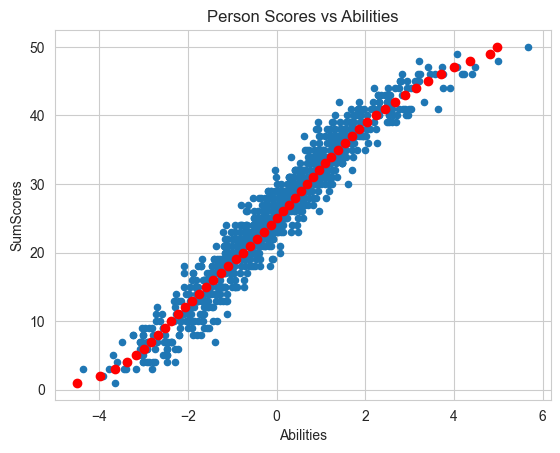

In [121]:
rf.plot_person_score_data_score_est(SumScores, RaschPolyPersonSummaryDataFrame.loc[:,['Estimate', 'Score']])

It is also possible to plot `icc` curves for each item among other plots (for instance category response curves, information curve, test characteristic curve and so on):

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.


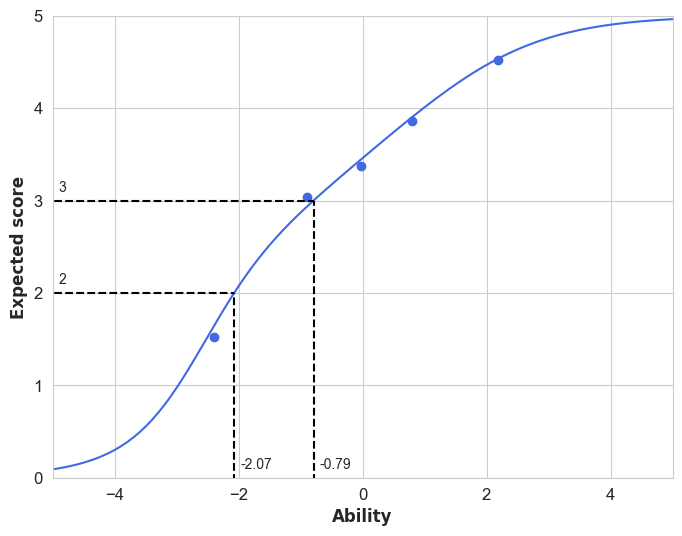

In [122]:
RaschPolyTestSim.icc("Item_1", obs = True, score_labels= True, score_lines = [2,3], no_of_classes=5)

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.


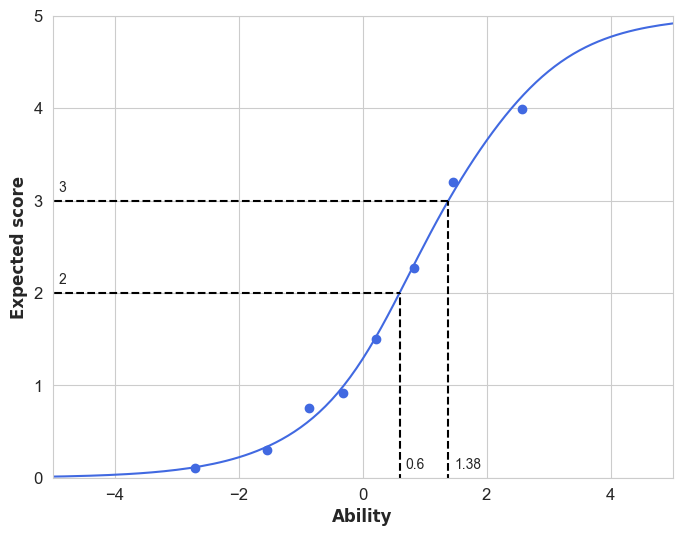

In [123]:
RaschPolyTestSim.icc("Item_2", obs = True, score_labels= True, score_lines = [2,3], no_of_classes=8)

## Polytomous data with new estimation method
We redo the exact procedure as above except this time we try to use the `"ls"` estimation method instead of the `"cos"` estimation method. I could not get the `"log-lik"` method to work with the simulated data due to a mismatch between dimensions in the calculations using the `"log-lik"`. I did not go too deep into troubleshooting, but it is worth noting, that the package has limitations. It should be a fairly standard dataset, that it can not handle.


In [124]:
RaschPolyTestSim = Rasch.PCM(PCM_Sims.scores)
RaschPolyTestSim.item_stats_df(full=True, method = "ls")

C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:2577: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for i in range(self.max_score_vector[item_1])]
C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:2576: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for j in range(self.max_score_vector[item_2])]
C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:549: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.il

In [125]:
RaschPolySummaryDataFrame = RaschPolyTestSim.item_stats.loc[:, ['Estimate', 'SE', '2.5%', '97.5%']]
RaschPolySummaryDataFrame["True Difficulty"] = PCM_Sims.diffs
RaschPolySummaryDataFrame["ConfInt contains True Difficulty"] = RaschPolySummaryDataFrame.apply(lambda x: x['2.5%'] <= x['True Difficulty'] <= x['97.5%'], axis=1)
RaschPolySummaryDataFrame

,Estimate,SE,2.5%,97.5%,True Difficulty,ConfInt contains True Difficulty
Item_1,-1.040,0.057,-1.161,-0.940,-1.0,True
Item_2,1.021,0.055,0.930,1.114,1.0,True
Item_3,-0.493,0.050,-0.603,-0.419,-0.5,True
Item_4,0.546,0.060,0.436,0.655,0.5,True
Item_5,0.224,0.047,0.142,0.304,0.1,False
Item_6,-0.137,0.045,-0.222,-0.056,-0.1,True
Item_7,-2.182,0.071,-2.346,-2.108,-2.0,False
Item_8,2.070,0.068,1.978,2.259,2.0,True
Item_9,2.383,0.091,2.288,2.623,2.5,True
Item_10,-2.392,0.108,-2.640,-2.222,-2.5,True


This model also manages to estimate the true parameters fairly well. I have not looked into how each estimation method works but this could perhaps be of interest to uncover, why one method works better than the other on this simulated data.

In [126]:
RaschPolyTestSim.person_stats_df(full=True, method = "ls")
RaschPolyTestSim.person_stats
# Then drop rownames and sort in ascending order of scores
RaschPolyPersonSummaryDataFrame = RaschPolyTestSim.person_stats[['Estimate', 'Score', 'CSEM']].drop_duplicates().sort_values(by='Score').reset_index(drop=True)
RaschPolyPersonSummaryDataFrame

C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:3823: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  person_stats_df['Infit MS'].update(self.person_infit_ms.round(dp))
C:\Users\brf337\Desktop\Rasch package\RaschPy\RaschPy\__init__.py:3824: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

,Estimate,Score,CSEM
0,-4.521,1,0.835
1,-4.005,2,0.663
2,-3.639,3,0.563
3,-3.368,4,0.501
4,-3.151,5,0.461
5,-2.967,6,0.435
6,-2.801,7,0.418
7,-2.645,8,0.407
8,-2.494,9,0.401
9,-2.342,10,0.399


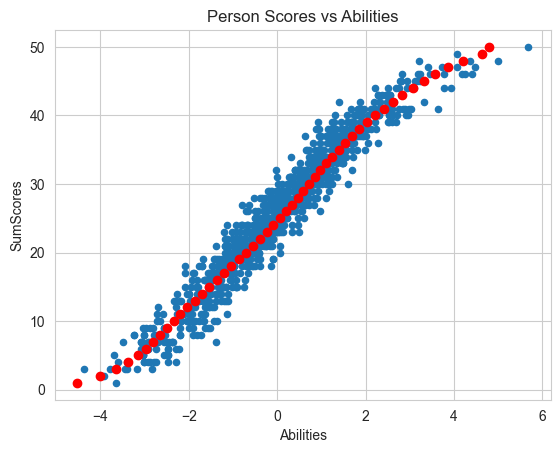

In [127]:
rf.plot_person_score_data_score_est(SumScores, RaschPolyPersonSummaryDataFrame.loc[:,['Estimate', 'Score']])

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.


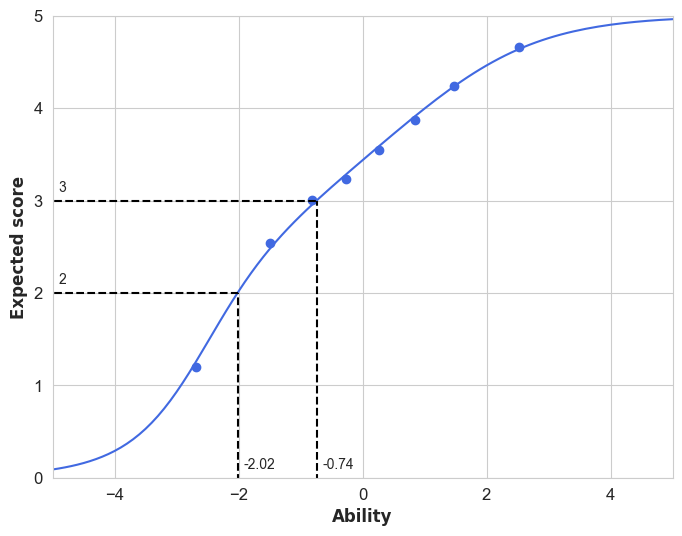

In [128]:
RaschPolyTestSim.icc("Item_1", obs = True, score_labels= True, score_lines = [2,3], no_of_classes=8)

findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.
findfont: Font family 'Times' not found.


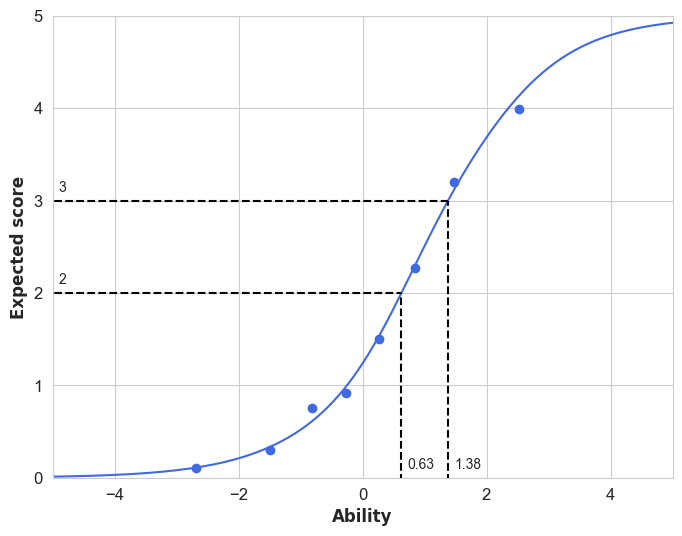

In [129]:
RaschPolyTestSim.icc("Item_2", obs = True, score_labels= True, score_lines = [2,3], no_of_classes=8)